# Worksheet 3 - Filtering in the spatial domain (TPI.2)

#### Notes:
- The purpose of this worksheet is to implement the concepts learned in the Biomedical Image Processing - Filtering in the spatial domain 
- The resolution of the exercises of this practical work must be sent by email with the name "PIB_GroupNumber_TPI.2"
- The images to be used are available in the curricular unit's moodle - "Worksheet images"

In [1]:
# command to allow the display of image and plots in the notebook
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


**Question 1**: Read and visualize the "head_clean.png" image and its noisy versions "head_gaussian_noise.png" and "head_saltpepper_noise". You must view the images side by side (horizontally)

In [2]:
h_clean=imread('head_clean.png')
h_gaussian=imread('head_gaussian_noise.png')
h_saltpepper=imread('head_saltpepper_noise.png')
h_clean.shape

(411, 352)

In [3]:
h_saltpepper.dtype

dtype('float32')

In [4]:
#-Convert images to uint8
def convert_to_uint8(img):
    return np.round(img*255).astype(np.uint8)

In [5]:
h_clean8=convert_to_uint8(h_clean)
h_gaussian8=convert_to_uint8(h_gaussian)
h_saltpepper8=convert_to_uint8(h_saltpepper)

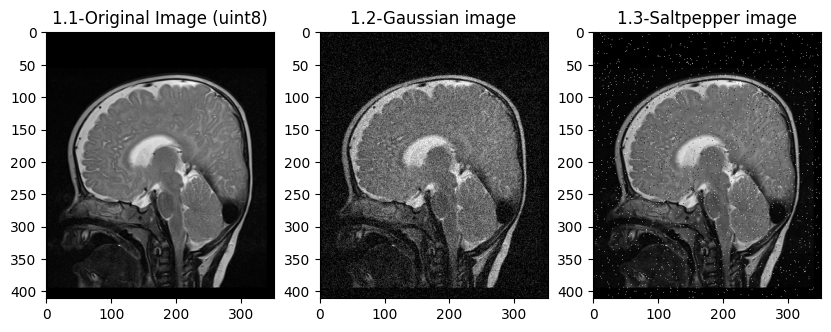

In [6]:
fig, (img1, img2, img3)=matplotlib.pylab.subplots(1,3,figsize=(10,8))

gray()
img1.imshow(h_clean8)
img1.title.set_text('1.1-Original Image (uint8)')
img2.imshow(h_gaussian8)
img2.title.set_text('1.2-Gaussian image')
img3.imshow(h_saltpepper8)
img3.title.set_text('1.3-Saltpepper image')

**Question 2**: Build a function to remove noise from the image "head_gaussian_noise.png" using the average filter. You must use neighborhood averaging to obtain the filtered image (not using the kernel convolution concept). Try it for the 3x3, 5x5, 9x9 neighborhood and comment the results.

In [7]:
def noise_redux(img,kr):
    #padding size
    p=int(floor(kr/2))
    
    #padding image with size
    h_pad=np.pad(img,p)
    
    #get image size
    (w,h)=img.shape
    
    #kernel shape and fill with 1/k_size (average)
    kernel = np.full(shape=(kr, kr),fill_value=1/(kr*kr))

    #start new image
    imgT=np.zeros((w+p*2,h+p*2))
    

    for i in range(p,w+p):
            for j in range(p,h+p):
                #get neighbours info
                neigh=h_pad[i-p:i+p+1,j-p:j+p+1]
                #multiply image and kernel matrix
                aux=np.multiply(kernel,neigh)
                #sum result
                imgT[i,j]=sum(aux)
    
    #unpadding result image
    imT= imgT[p:w+p,p:h+p]
    
    return imT

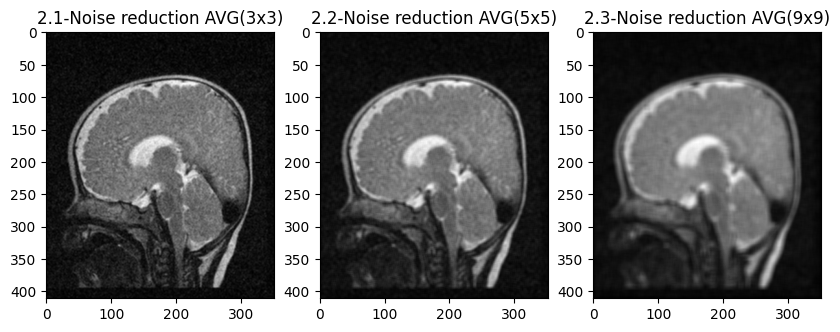

In [8]:
im_avg3=noise_redux(h_gaussian8,3)
im_avg5=noise_redux(h_gaussian8,5)
im_avg9=noise_redux(h_gaussian8,9)

fig, (img1, img2, img3)=matplotlib.pylab.subplots(1,3,figsize=(10,8))
img1.imshow(im_avg3)
img1.title.set_text('2.1-Noise reduction AVG(3x3)')
img2.imshow(im_avg5)
img2.title.set_text('2.2-Noise reduction AVG(5x5)')
img3.imshow(im_avg9)
img3.title.set_text('2.3-Noise reduction AVG(9x9)')

**Question 3**: Build a function to remove noise from the image "head_saltpepper_noise.png" using the median filter. Try it for the 3x3, 5x5, 9x9 neighborhood and comment the results.

In [9]:
#também comparar com a média
def noise_redux_median(img,kr): 
    p=int(floor(kr/2))
    
    h_pad=np.pad(img,p)

    (w,h)=img.shape
    kernel=kr*kr
    
    

    imgT=np.zeros((w+p*2,h+p*2))

    for i in range(p,w+p):
            for j in range(p,h+p):
                    neigh=h_pad[i-p:i+p+1,j-p:j+p+1]
                    aux=median(neigh)
                    imgT[i,j]=aux
    imT= imgT[p:w+p,p:h+p]
    return imT

#fazer com mudança do sigma

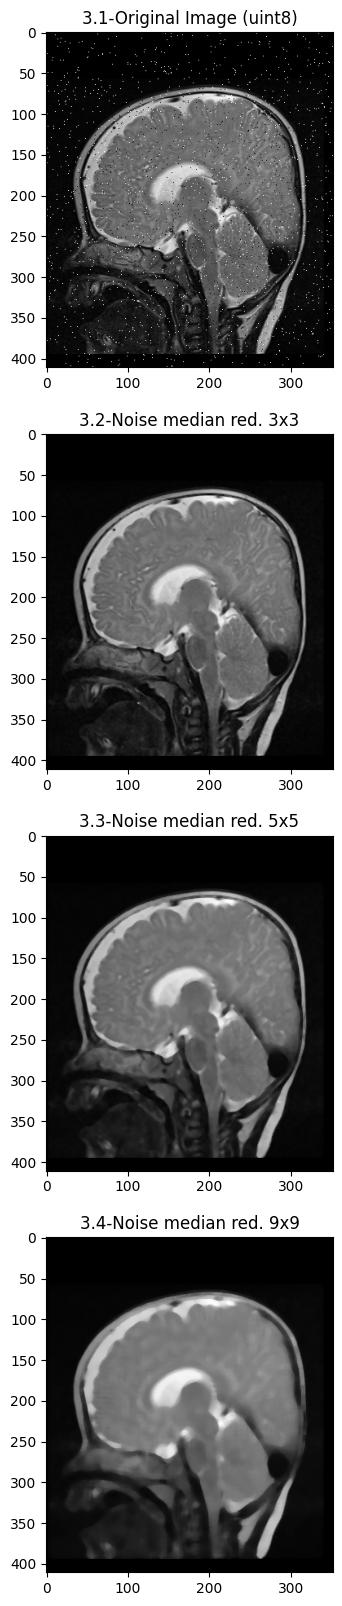

In [12]:
im3=noise_redux_median(h_saltpepper8,3)
im5=noise_redux_median(h_saltpepper8,5)
im9=noise_redux_median(h_saltpepper8,9)

fig, (img1, img2, img3, img4)=matplotlib.pylab.subplots(4,1,figsize=(24,20))
img1.imshow(h_saltpepper8)
img1.title.set_text('3.1-Original Image (uint8)')
img2.imshow(im3)
img2.title.set_text('3.2-Noise median red. 3x3')
img3.imshow(im5)
img3.title.set_text('3.3-Noise median red. 5x5')
img4.imshow(im9)
img4.title.set_text('3.4-Noise median red. 9x9')

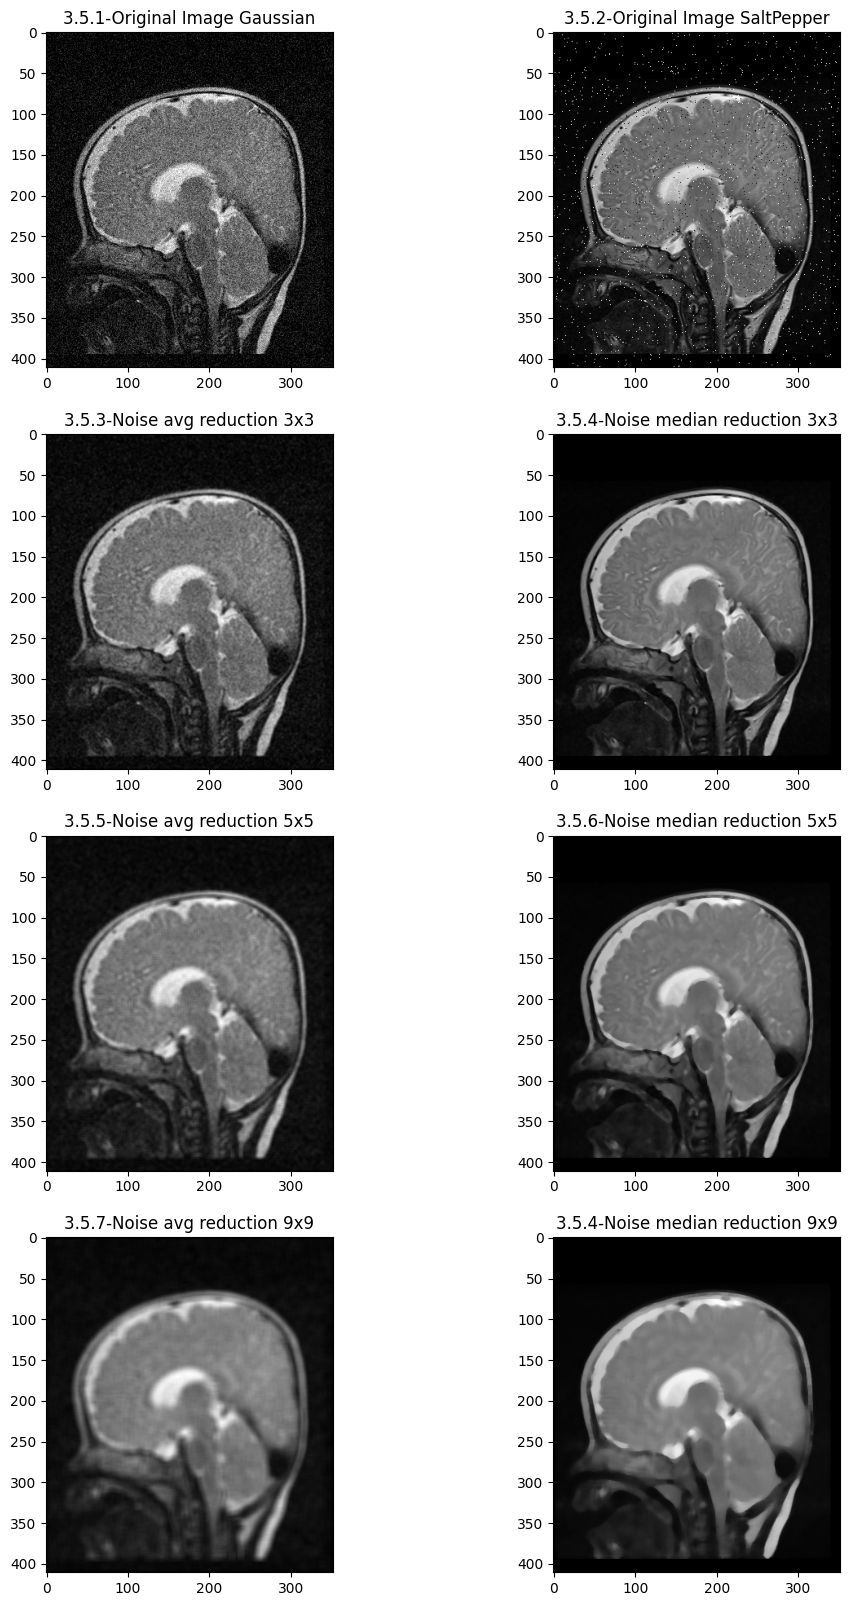

In [20]:
#comparar com média
fig, ((img1, img2), (img3,img4),(img5,img6),(img7,img8))=matplotlib.pylab.subplots(4,2,figsize=(12,20))
img1.imshow(h_gaussian8)
img1.title.set_text('3.5.1-Original Image Gaussian')
img2.imshow(h_saltpepper8)
img2.title.set_text('3.5.2-Original Image SaltPepper')
img3.imshow(im_avg3)
img3.title.set_text('3.5.3-Noise avg reduction 3x3')
img4.imshow(im3)
img4.title.set_text('3.5.4-Noise median reduction 3x3')
img5.imshow(im_avg5)
img5.title.set_text('3.5.5-Noise avg reduction 5x5')
img6.imshow(im5)
img6.title.set_text('3.5.6-Noise median reduction 5x5')
img7.imshow(im_avg9)
img7.title.set_text('3.5.7-Noise avg reduction 9x9')
img8.imshow(im9)
img8.title.set_text('3.5.4-Noise median reduction 9x9')

**Question 4**: Build a function to filter an image using the principle of convolution with kernels. Apply the function in the image "head_gaussian_noise.png" with the gaussian kernel presented in the classes.

In [21]:
#kernel
def kernel_build(k,sigma):
    
#     k=5
#     sigma=1.5 #sigma

    w=int(k/2)

    Gauss =np.zeros((k,k))

    for i in range(-w,w+1):
        for j in range(-w, w+1):
            Gauss[i+w,j+w]=(1/(2*3.14*sigma**2))*math.exp(-(((i**2)+(j**2))/(2*(sigma**2))))

    Gauss=Gauss/sum(Gauss)
    return Gauss

In [25]:
k3=kernel_build(3,2)
k5=kernel_build(5,2)
k9=kernel_build(9,2)

In [24]:
np.sum(k3)

1.0000000000000002

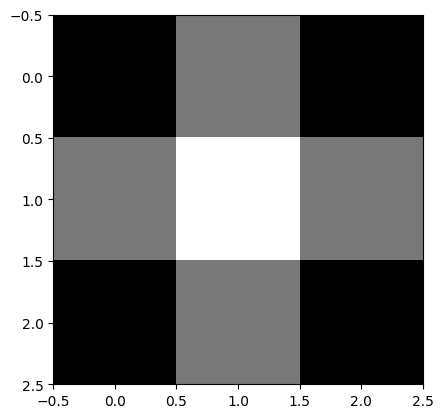

In [26]:
imshow(k3)

In [28]:
def noise_redux_gaussian(img,kr,sigma):
    #padding size
    p=int(floor(kr/2))
    
    #padding image with size
    h_pad=np.pad(img,p)
    
    #get image size
    (w,h)=img.shape
    
    #kernel shape and fill with 1/k_size (average)
    kernel = kernel_build(kr,sigma)

    #start new image
    imgT=np.zeros((w+p*2,h+p*2))
    

    for i in range(p,w+p):
            for j in range(p,h+p):
                #get neighbours info
                neigh=h_pad[i-p:i+p+1,j-p:j+p+1]
                #multiply image and kernel matrix
                aux=np.multiply(kernel,neigh)
                #sum result
                imgT[i,j]=sum(aux)
    
    #unpadding result image
    imT= imgT[p:w+p,p:h+p]
    
    return imT

In [35]:
im1=noise_redux_gaussian(h_gaussian8,5,1.8)

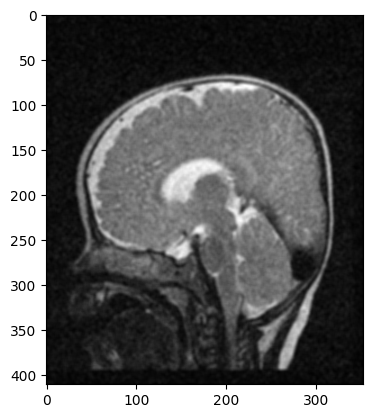

In [36]:
imshow(im1)

**Question 5**: Detect the edges of the image "head_clean.png" using the sobel filter. It should present the results for the derivatives for each direction, as well as the final result.

In [38]:
kr_vertical=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(kr_vertical)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [43]:
kr_horiz=kr_vertical.transpose()
print(kr_horiz)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [46]:
def edge_detect_sobel(img,kr,kernel):
    #padding size
    p=int(floor(kr/2))
    
    #padding image with size
    h_pad=np.pad(img,p)
    
    #get image size
    (w,h)=img.shape
    
    #start new image
    imgT=np.zeros((w+p*2,h+p*2))
    

    for i in range(p,w+p):
            for j in range(p,h+p):
                #get neighbours info
                neigh=h_pad[i-p:i+p+1,j-p:j+p+1]
                #multiply image and kernel matrix
                aux=np.multiply(kernel,neigh)
                #sum result
                imgT[i,j]=sum(aux)
    
    #unpadding result image
    imT= imgT[p:w+p,p:h+p]
    
    return imT

In [49]:
im_sobel1=edge_detect_sobel(h_clean,3,kr_vertical)
im_sobel2=edge_detect_sobel(h_clean,3,kr_horiz)

In [62]:
def edge_detect_sobel_final(img_vert,img_horz):
    (w,h)=img_vert.shape
    
    imgT=np.zeros((w,h))

    dx2=np.square(img_vert)
    dy2=np.square(img_horz)
    sumb=np.add(dx2,dy2)
    imgT=np.sqrt(sumb)
    
    #Falta converter para uint8, penso que com aquela solução de transposição da aula...
    return imgT
            

In [63]:
sob=edge_detect_sobel_final(im_sobel1,im_sobel2)

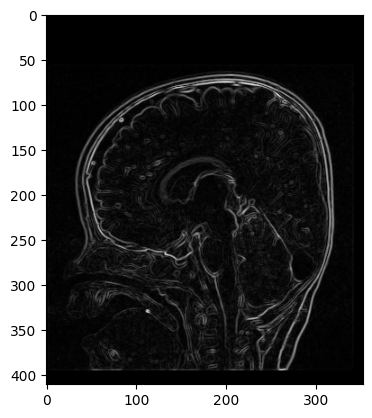

In [64]:
imshow(sob)

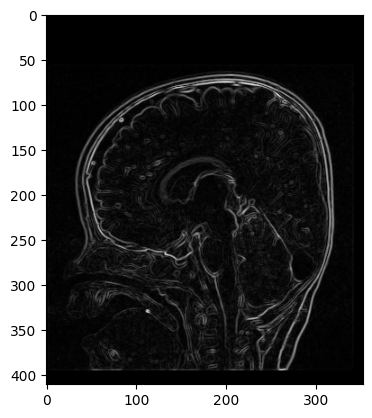

In [55]:
fig, (img1, img2, img3, img4)=matplotlib.pylab.subplots(4,1,figsize=(24,20))
img1.imshow(h_clean)
img1.title.set_text('5.1-Original Image (uint8)')
img2.imshow(im_sobel1)
img2.title.set_text('5.2-Noise median red. 3x3')
img3.imshow(im_sobel2)
img3.title.set_text('3.3-Noise median red. 5x5')
img4.imshow(sob)
img4.title.set_text('3.4-Noise median red. 9x9')

**Question 6**: Faça a deteção dos contornos da imagem "head_clean.png" usando o filtro de laplaciano.

**Question 7**: Replique o algoritmo de enhancement apresentado nas aulas. O algoritmo deve ser aplicado à imagem "skeleton_orig.tif". 